In [60]:
import pandas as pd
import numpy as np
from numpy import mean

In [59]:
import matplotlib.pyplot as plt

In [67]:
data=pd.read_csv("C:/Users/sphanindrakumar/Downloads/Capstone Project4_Book Recommendation/Capstone6_Book Recommendation/BOOKSMASTERTRAIN.csv")

In [68]:
stat=pd.read_csv("C:/Users/sphanindrakumar/Downloads/Capstone Project4_Book Recommendation/Capstone6_Book Recommendation/BOOKSCATALOGUE.csv")

In [69]:
user=pd.read_csv("C:/Users/sphanindrakumar/Downloads/Capstone Project4_Book Recommendation/Capstone6_Book Recommendation/USERMASTER.csv");

In [71]:
pur=pd.read_csv("C:/Users/sphanindrakumar/Downloads/Capstone Project4_Book Recommendation/Capstone6_Book Recommendation/BOOKSPURCHHISTORY.csv")

# Most Rated Books

C:\Users\SPHANI~1\AppData\Local\Temp/ipykernel_12124/1276620185.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df["BOOKTITLE"],rotation=90)


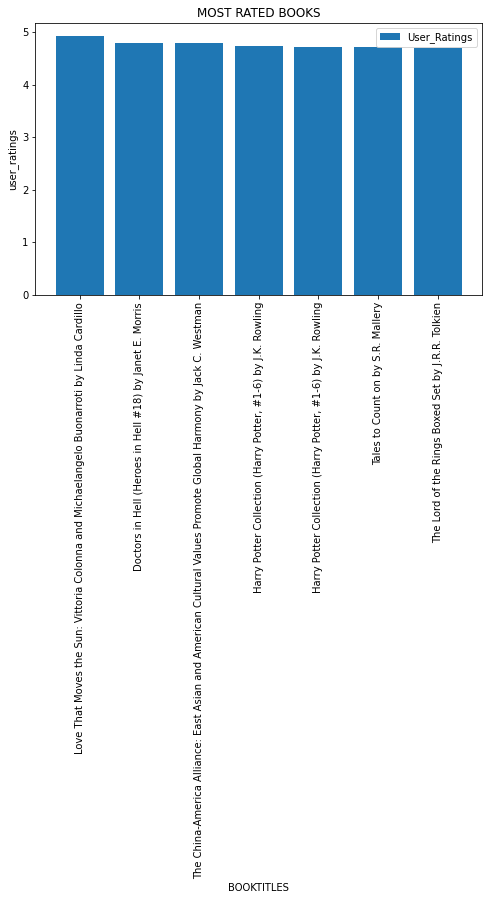

In [62]:
fig,ax=plt.subplots();
df=pd.DataFrame(data.sort_values(by="USERRATINGS",ascending=False)[["BOOKTITLE","USERRATINGS"]].head(8))
ax.bar(df["BOOKTITLE"],df["USERRATINGS"],label="User_Ratings")
ax.legend()
ax.set_xlabel("BOOKTITLES");
ax.set_ylabel("user_ratings")
ax.set_title("MOST RATED BOOKS")
ax.set_xticklabels(df["BOOKTITLE"],rotation=90)
fig.set_size_inches([8,5])
plt.show()

# Most Popular Books

C:\Users\SPHANI~1\AppData\Local\Temp/ipykernel_12124/390913000.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df2["BOOKTITLE"],rotation=90)


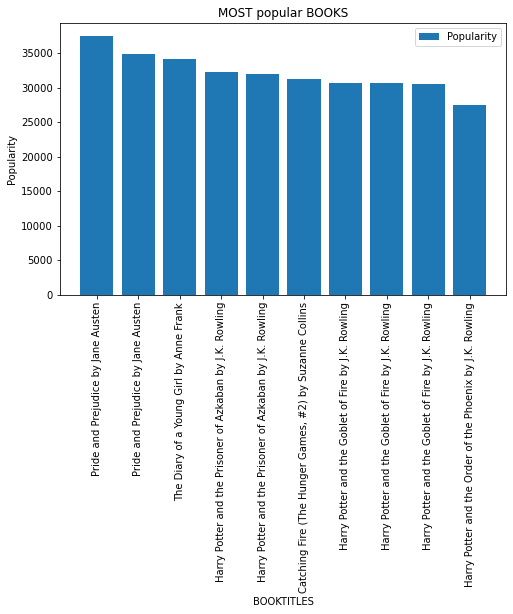

In [86]:
fig,ax=plt.subplots();
df2=pd.DataFrame(data.sort_values(by="Popularity",ascending=False)[["BOOKTITLE","Popularity"]]).iloc[0:15]
ax.bar(df2["BOOKTITLE"],df2["Popularity"],label="Popularity")
ax.legend()
ax.set_xlabel("BOOKTITLES");
ax.set_ylabel("Popularity")
ax.set_title("MOST popular BOOKS")
ax.set_xticklabels(df2["BOOKTITLE"],rotation=90)
fig.set_size_inches([8,5])
plt.show()

# Most Popular Authors

In [13]:
df4=(  data.groupby(["AUTHOR"])["Popularity"].agg(max) ) .sort_values(ascending=False).head(10)
finaldf=pd.DataFrame(df4);
finaldf.reset_index(inplace=True)
finaldf

,AUTHOR,Popularity
0,Jane Austen,37492.58984
1,Anne Frank,34899.53965
2,J.K. Rowling,34132.10573
3,Suzanne Collins,32239.97624
4,J.R.R. Tolkien,30711.58301
5,C.S. Lewis,27509.45946
6,Kathryn Stockett,27422.72052
7,William Shakespeare,27395.69350
8,Alice Sebold,26966.58747
9,Paulo Coelho,25389.99109


C:\Users\SPHANI~1\AppData\Local\Temp/ipykernel_21712/3477675585.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(finaldf["AUTHOR"],rotation=90)


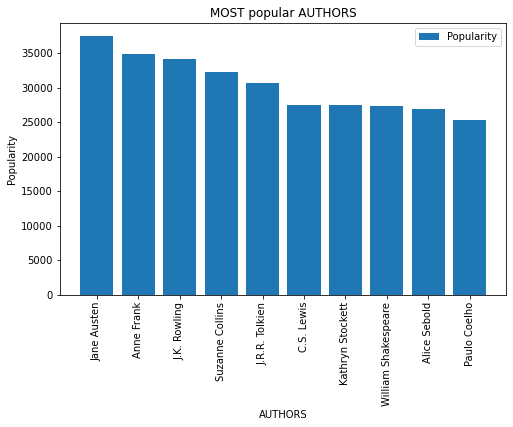

In [263]:
fig,ax=plt.subplots();
ax.bar(finaldf["AUTHOR"],finaldf["Popularity"],label="Popularity")
ax.legend()
ax.set_xlabel("AUTHORS");
ax.set_ylabel("Popularity")
ax.set_title("MOST popular AUTHORS")
ax.set_xticklabels(finaldf["AUTHOR"],rotation=90)
fig.set_size_inches([8,5])
plt.show()

#  states and substates with most number of books

In [73]:
res=(stat.groupby(["STATE"]).count()["BookID"]).sort_values(ascending=False).head(10)
res=pd.DataFrame(res);
res.reset_index(inplace=True);
res

,STATE,BookID
0,California,6117
1,Texas,2243
2,Florida,1798
3,Ohio,892
4,Georgia,889
5,New York,878
6,Illinois,868
7,North Carolina,823
8,Michigan,806
9,Pennsylvania,799


In [57]:
res2=(stat.groupby(["SUBSTATE"]).count()["BookID"]).sort_values(ascending=False).head(10)
res2=pd.DataFrame(res2);
res2.reset_index(inplace=True);
res2


,SUBSTATE,BookID
0,San Antonio,1177
1,Los Angeles,1160
2,Houston,1066
3,San Diego,1027
4,Miami,987
5,Ohio,892
6,Georgia,889
7,New York,878
8,Illinois,868
9,Orange,823


C:\Users\SPHANI~1\AppData\Local\Temp/ipykernel_12124/3203987368.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(res["STATE"],rotation=90)
C:\Users\SPHANI~1\AppData\Local\Temp/ipykernel_12124/3203987368.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(res2["SUBSTATE"],rotation=90)


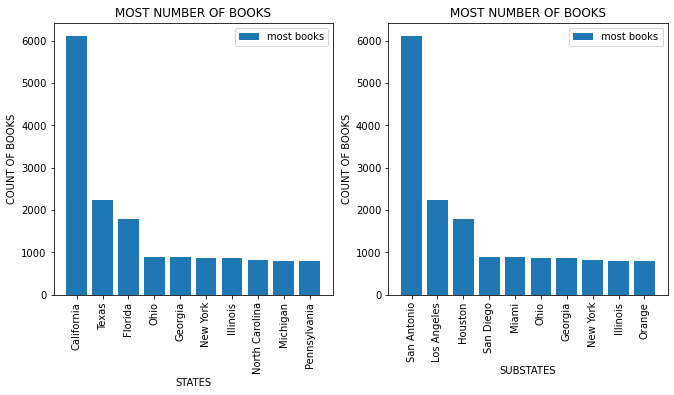

In [58]:
fig,ax=plt.subplots(1,2);
ax[0].bar(res["STATE"],res["BookID"],label="most books");
ax[0].legend();
ax[0].set_xlabel("STATES");
ax[0].set_ylabel("COUNT OF BOOKS")
ax[0].set_title("MOST NUMBER OF BOOKS")
ax[0].set_xticklabels(res["STATE"],rotation=90)

ax[1].bar(res2["SUBSTATE"],res["BookID"],label="most books");
ax[1].legend();
ax[1].set_xlabel("SUBSTATES");
ax[1].set_ylabel("COUNT OF BOOKS")
ax[1].set_title("MOST NUMBER OF BOOKS")
ax[1].set_xticklabels(res2["SUBSTATE"],rotation=90)

fig.set_size_inches([11,5])

plt.show() 

# Average rating distribution for all books

In [33]:
import seaborn as sns

C:\Users\sphanindrakumar\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


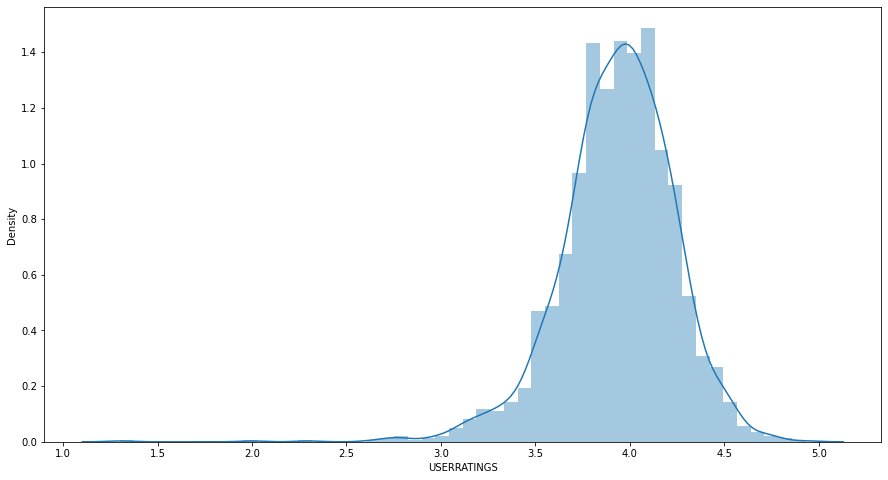

In [34]:
plt.figure(figsize = (15,8))
sns.distplot(data['USERRATINGS'])
plt.show()

# Age group of the user with most read books based on Genre

In [37]:
user["UserID"]=user["UserID"].astype("object");
user=user.drop((user[user['DELETED'].isnull()==False]).index);
user.drop(columns=["DELETED"],inplace=True);
user['STATE'].fillna('unknown',inplace=True);
user.drop("SIGNUPDATE",axis=1,inplace=True);
user.rename(columns={"AGEGROUP":"AGE"},inplace=True);

In [38]:
for i in user.index:
    if user.loc[i,'AGE']>0 and user.loc[i,"AGE"]<=30:
        user.loc[i,"AGEGROUP"]='young'
    elif user.loc[i,'AGE']>30 and user.loc[i,"AGE"]<=55:
        user.loc[i,"AGEGROUP"]='Middle-aged'
    elif user.loc[i,'AGE']>55 and user.loc[i,"AGE"]<=100:
        user.loc[i,"AGEGROUP"]="Old"
    

In [39]:
user.head()

,UserID,AGE,GENDER,STATE,AGEGROUP
0,600003,28.0,FEMALE,unknown,young
1,600008,43.0,MALE,unknown,Middle-aged
2,600011,35.0,MALE,unknown,Middle-aged
4,600020,53.0,MALE,Pennsylvania,Middle-aged
5,600028,33.0,FEMALE,Pennsylvania,Middle-aged


In [42]:
pur.drop(columns = ['TIMESTAMP','WeekofYear'],inplace = True)

In [43]:
columns = ['BookID','UserID']
for col in columns:
    pur[col] = pur[col].astype('object')

In [44]:
pur.head()

,BookID,UserID,SUBSTATE
0,140361,608502,Santa Clara
1,118603,673204,San Diego
2,170523,641650,Oklahoma
3,111924,619531,Orlando
4,178056,628661,Orange


In [77]:
book_pur = pd.merge(pur,data,on='BookID',how ='inner')

In [74]:
book_user = pd.merge(user,book_pur,on = 'UserID',how ='inner')
book_user

,UserID,SIGNUPDATE,DELETED,AGEGROUP,GENDER,STATE,BookID,SUBSTATE,GENRE,BOOKTITLE,...,SERIES,AUTHOR,USERRATINGS,OTHERPRINTEDINFO,DETAILS,SUMMARY,GENRE.1,AUTHORDESC,COVERPAGE,Popularity
0,600008,2017-11-02 20:33:20,NaN,43.0,MALE,NaN,165498,Miami,Nonfiction,"Hope in the Dark: Untold Histories, Wild Possi...",...,(Essays - Solnit Trilogy),Rebecca Solnit,4.07,"['Paperback, 182 pages', 'Published December 2...","[('Original Title', 'Hope in the Dark'), ('ISB...",When the first edition of Hope in the Dark was...,Nonfiction,Rebecca Solnit is an American author who often...,https://images.gr-assets.com/books/1422907952l...,67.894268
1,600011,2017-11-21 02:03:30,NaN,35.0,MALE,NaN,155019,San Bernardino,Nonfiction,The Truth about Medium: Extraordinary Experime...,...,NaN,Gary E. Schwartz,3.70,"['Hardcover, 149 pages', 'Published October 5t...","[('Original Title', ""The Truth About Medium: E...",Every Monday night millions of Americans tune ...,Nonfiction,"Gary E. Schwartz, Ph.D., is Professor of Psych...",https://images.gr-assets.com/books/1348218682l...,1.277101
2,600011,2017-11-21 02:03:30,NaN,35.0,MALE,NaN,162488,San Bernardino,Historical > Historical Fiction,Happy Birthday Molly! A Springtime Story by Va...,...,(American Girl: Molly #4),Valerie Tripp,3.92,"['64 pages', 'Published (first published 1987)']","[('Original Title', 'Happy Birthday, Molly: A ...",Molly is excited to learn that an English girl...,Historical > Historical Fiction,"Valerie Tripp is a children's book author, bes...",https://images.gr-assets.com/books/1217926711l...,44.728245
3,600020,2017-11-13 22:29:13,NaN,53.0,MALE,Pennsylvania,105481,Pennsylvania,Fiction,The Alchemist by Paulo Coelho,...,NaN,Paulo Coelho,3.85,"['Paperback, 197 pages', 'Published May 1st 19...","[('Original Title', 'O Alquimista'), ('ISBN', ...",Paulo Coelho's masterpiece tells the mystical ...,Fiction,The Brazilian author PAULO COELHO was born in ...,https://images.gr-assets.com/books/1483412266l...,25389.991090
4,600020,2017-11-13 22:29:13,NaN,53.0,MALE,Pennsylvania,154892,Alabama,Fiction,My Name Is Asher Lev by Chaim Potok,...,NaN,Chaim Potok,4.20,"['Paperback, 369 pages', 'Published March 11th...","[('Original Title', 'My Name Is Asher Lev'), (...","Asher Lev is a Ladover Hasid who keeps kosher,...",Fiction,"Herman Harold Potok, or Chaim Tzvi, was born i...",https://images.gr-assets.com/books/1385056726l...,496.168696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18816,674967,2017-10-29 12:23:47,NaN,63.0,MALE,California,110743,San Bernardino,Historical > Historical Fiction,La Pourpre et l'olivier by Gilbert Sinoué,...,NaN,Gilbert Sinoué,3.79,"['Mass Market Paperback, Folio, 628 pages', 'P...","[('Original Title', ""La pourpre et l'olivier, ...","Deux siècles après la mort du Christ, l'Eglise...",Historical > Historical Fiction,"At age 19, after studying at a Catholic Jesuit...",https://images.gr-assets.com/books/1173118926l...,1.395901
18817,674984,2018-01-12 02:40:48,NaN,40.0,FEMALE,NaN,100987,Orange,History,The Horrible History of the World by Terry Deary,...,(Horrible Histories),Terry Deary,4.23,"['Paperback, 96 pages', 'Published September 4...","[('Original Title', 'The Horrible History of t...",Terry Deary presents the foul but fascinating ...,History,"A former actor, theatre-director and drama tea...",https://images.gr-assets.com/books/1387736691l...,7.113157
18818,674984,2018-01-12 02:40:48,NaN,40.0,FEMALE,NaN,115011,Illinois,Science Fiction,Ubik by Philip K. Dick,...,NaN,Philip K. Dick,4.11,"['Paperback, Ventana Abierta, 288 pages', 'Pub...","[('Original Title', 'Ubik'), ('ISBN', '\n ...",Glen Runciter est muerto. O lo estn todos los ...,Science Fiction,Philip K. Dick was born in Chicago in 1928 and...,https://images.gr-assets.com/books/1327995569l...,1042.753193
18819,674986,2017-07-26 17:21:53,NaN,46.0,MALE,New York,111925,Los Angeles,Romance,"Beautiful Disaster (Beautiful, #1) by Jamie Mc...",...,(Beautiful #1),Jamie McGuire,4.12,"['Kin

C:\Users\sphanindrakumar\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


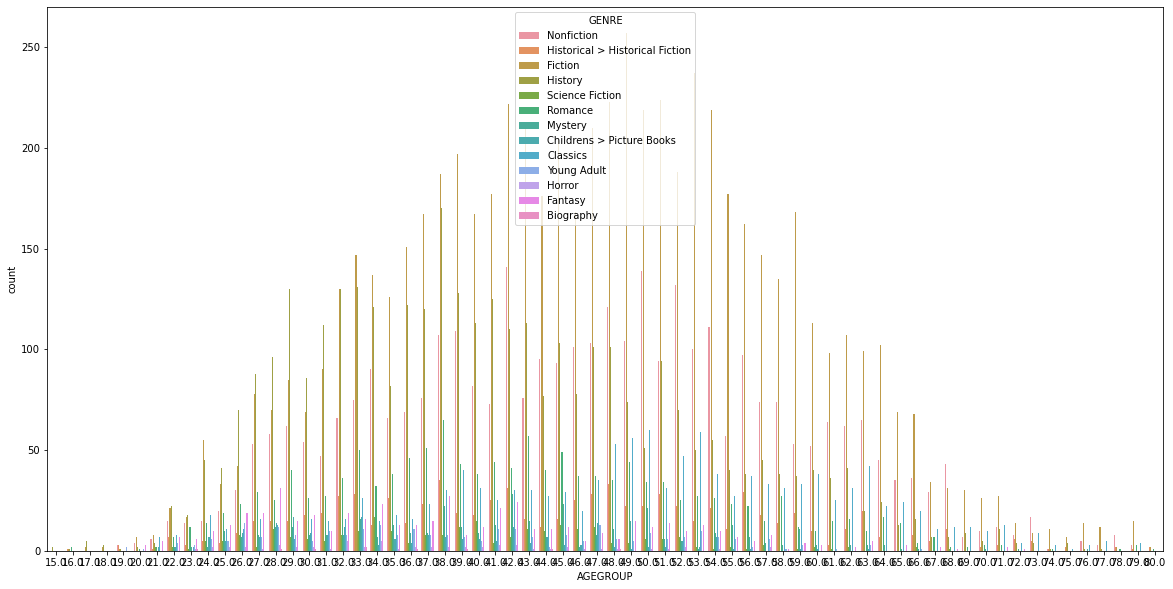

In [82]:
plt.figure(figsize = (20,10))
sns.countplot('AGEGROUP',hue = 'GENRE',data = book_user)
plt.show()